In [3]:
import lyricsgenius as genius
import billboard

In [4]:
api = genius.Genius('4vPfh0l1I33h0qqY-Bzn1ITfTGl_MPnKBHRRk_8XgvKnX70r9bumFYPWRkJ2VNSl')

chart = billboard.ChartData('hot-100')

In [16]:
songs = []

for song in chart:
    lyric = api.search_song(song.title)
    songs.append(lyric)

Searching for "God's Plan" by ...
Done.
Searching for "Meant To Be" by ...
Done.
Searching for "Psycho" by ...
Done.
Searching for "Call Out My Name" by ...
Done.
Searching for "Look Alive" by ...
Done.
Searching for "The Middle" by ...
Done.
Searching for "Perfect" by ...
Done.
Searching for "Finesse" by ...
Done.
Searching for "Freaky Friday" by ...
Done.
Searching for "Walk It Talk It" by ...
Done.
Searching for "Havana" by ...
Done.
Searching for "Mine" by ...
Done.
Searching for "Plug Walk" by ...
Done.
Searching for "Never Be The Same" by ...
Done.
Searching for "Pray For Me" by ...
Done.
Searching for "Be Careful" by ...
Done.
Searching for "Stir Fry" by ...
Done.
Searching for "Sad!" by ...
Done.
Searching for "All The Stars" by ...
Done.
Searching for "Ric Flair Drip" by ...
Done.
Searching for "Rockstar" by ...
Done.
Searching for "New Rules" by ...
Done.
Searching for "Whatever It Takes" by ...
Done.
Searching for "Let You Down" by ...
Done.
Searching for "Friends" by ...
Do

In [31]:
lyrics = []

for song in songs:
    lyrics.append(song.lyrics)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(lyrics)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(lyrics)
tf_feature_names = tf_vectorizer.get_feature_names()

In [33]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

num_topics = 10

# Run NMF
nmf = NMF(n_components=num_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_topics=num_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

C:\Users\Sidharth\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [37]:
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-num_top_words - 1:-1]]))

num_top_words = 10
display_topics(nmf, tfidf_feature_names, num_top_words)
display_topics(lda, tf_feature_names, num_top_words)

Topic 0:
don just ll time ain got know like let girl
Topic 1:
bitch nigga fuck like niggas yeah ain lil pew shit
Topic 2:
que tú yo te la el quiero pa en eres
Topic 3:
love ooh nothin drug believe oh bad day days ve
Topic 4:
wait takes hate minute willing face way doesn nigga lose
Topic 5:
oh swear woah yeah cross end night woman day mama
Topic 6:
isn blood giving help somebody walls like feel cool chill
Topic 7:
took harder po away hard skrrt ain way yeah 12
Topic 8:
ayy goin bad yeah like things got yuh oooh fuckin
Topic 9:
better stay huh mama babe like talking ve eyes lost
Topic 0:
wait takes yeah cause love lights turn like oh break
Topic 1:
isn didn wait start hate cause minute face burning light
Topic 2:
got ve just like ll yeah boo ain away head
Topic 3:
na ooh took ayy oh hey like heart gon po
Topic 4:
thunder feel muy la way better things just dale don
Topic 5:
know don yeah ain like oh got just let wanna
Topic 6:
don just like que oh yo la got tú te
Topic 7:
don got wanna li

In [39]:
print(nmf.transform(tfidf))

[[  3.37636426e-02   0.00000000e+00   0.00000000e+00   2.18300624e-02
    1.17933248e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
    6.76884504e-01   0.00000000e+00]
 [  2.15094945e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.57350230e-02   1.19111617e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    4.85265352e-01   6.76820505e-03]
 [  2.09329557e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
    2.79060674e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   4.45827178e-02]
 [  5.01758283e-02   3.06931059e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   3.62218303e-03   0.00000000e+00   0.00000000e+00
    3.27550888e-02   4.47184574e-02]
 [  1.90944545e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000

In [51]:
import numpy as np
import pandas as pd

df = pd.DataFrame()
titles = []
artists = []
for song in chart:
    titles.append(song.title)
    artists.append(song.artist)
df['Title'] = titles
df['Artist'] = artists
df = df.join(pd.DataFrame(nmf.transform(tfidf)))

In [52]:
df

,Title,Artist,0,1,2,3,4,5,6,7,8,9
0,God's Plan,Drake,0.033764,0.000000,0.000000,0.021830,0.117933,0.000000,0.000000,0.0,0.676885,0.000000
1,Meant To Be,Bebe Rexha & Florida Georgia Line,0.215095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,Psycho,Post Malone Featuring Ty Dolla $ign,0.015735,0.119112,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.485265,0.006768
3,Call Out My Name,The Weeknd,0.209330,0.000000,0.000000,0.000000,0.279061,0.000000,0.000000,0.0,0.000000,0.044583
4,Look Alive,BlocBoy JB Featuring Drake,0.050176,0.306931,0.000000,0.000000,0.000000,0.003622,0.000000,0.0,0.032755,0.044718
5,The Middle,"Zedd, Maren Morris & Grey",0.190945,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
6,Perfect,Ed Sheeran,0.160265,0.000000,0.000000,0.092086,0.000000,0.010288,0.000000,0.0,0.000000,0.000000
7,Finesse,Bruno Mars & Cardi B,0.148685,0.000000,0.000000,0.000000,0.000000,0.007923,0.000000,0.0,0.425196,0.000000
8,Freaky Friday,Lil Dicky Featuring Chris Brown,0.003136,0.370210,0.000000,0.002131,0.137754,0.165159,0.000000,0.0,0.000000,0.000000
9,Walk It Talk It,Migos Featuring Drake,0.031261,0.089026,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


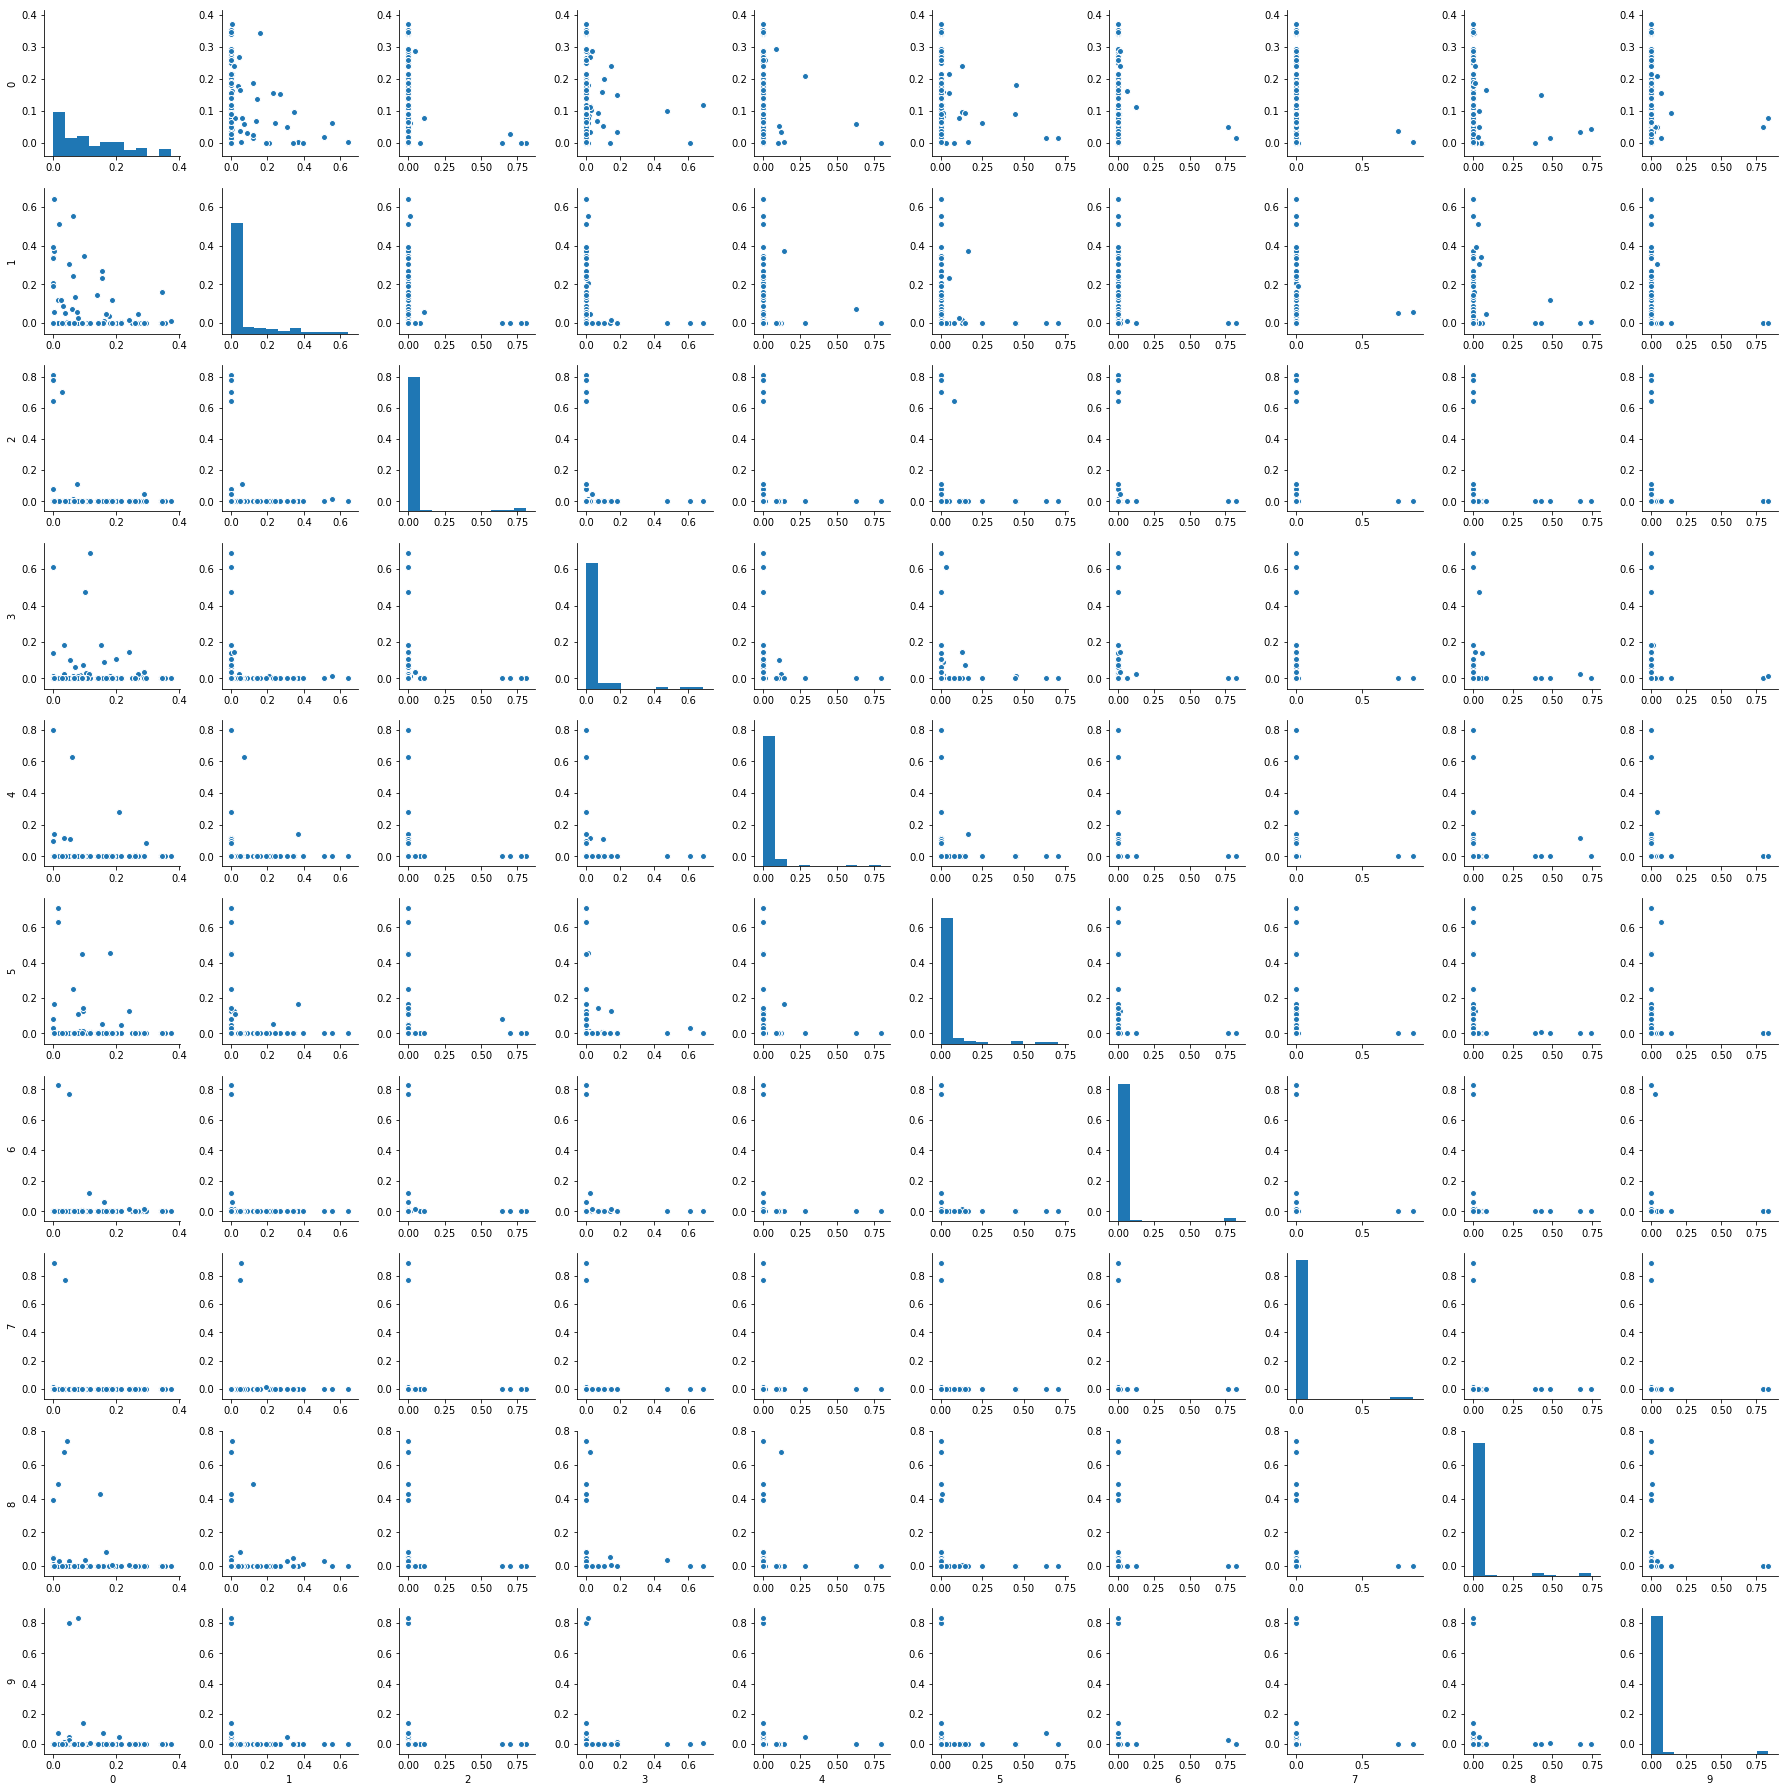

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)

In [78]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(df[[1, 2, 3, 4, 5, 6, 7, 8, 9]])
#principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
print(pca.explained_variance_ratio_)

[ 0.16914817  0.13988134  0.12156999  0.10918396  0.10597152  0.10222893
  0.09696445  0.08958442]


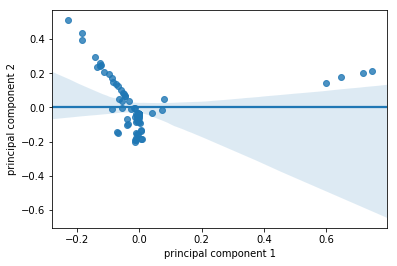

In [73]:
sns.regplot(principalDf['principal component 1'], principalDf['principal component 2'])

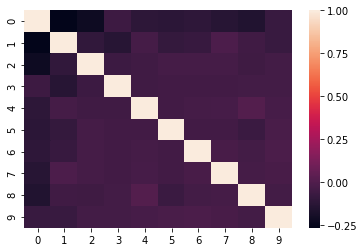

In [75]:
corr = df[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]].corr()
sns.heatmap(corr)

In [79]:
from sklearn.cluster import MeanShift
X = df[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

In [81]:
print(np.round(cluster_centers, 2))

[[ 0.15  0.04  0.    0.02  0.01  0.01  0.    0.    0.    0.  ]
 [ 0.05  0.03  0.    0.    0.02  0.    0.    0.    0.54  0.  ]
 [ 0.07  0.    0.    0.    0.    0.5   0.    0.    0.    0.01]
 [ 0.01  0.    0.73  0.    0.    0.02  0.    0.    0.    0.  ]
 [ 0.07  0.    0.    0.59  0.    0.01  0.    0.    0.01  0.  ]
 [ 0.03  0.04  0.    0.    0.71  0.    0.    0.    0.    0.  ]
 [ 0.03  0.    0.    0.    0.    0.    0.8   0.    0.    0.01]
 [ 0.06  0.    0.    0.01  0.    0.    0.    0.    0.    0.82]
 [ 0.02  0.05  0.    0.    0.    0.    0.    0.83  0.    0.  ]]


In [82]:
print(labels)

[1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 5 6 2 2 0 0 0 0
 0 1 0 0 4 0 2 0 6 0 5 0 0 0 0 0 0 7 0 0 0 3 0 0 0 3 0 0 0 0 8 0 8 0 0 7 0
 0 0 0 0 0 0 0 4 0 0 0 2 0 0 0 0 3 0 0 2 3 0 4 0 0 0]
